In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## **Dataset Information**

The dataset contains the following features:

- **price:** Price in US dollars  
- **carat:** Weight of the diamond  
- **cut:** Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  
- **color:** Diamond color, from J (worst) to D (best)  
- **clarity:** Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))  
- **x:** Length in mm  
- **y:** Width in mm
- **z:** Depth in mm
- **depth:** Total depth percentage
- **table:** Width of the top of the diamond relative to its widest point

## First Look

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Drop unnecessary columns #1

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# info

In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
print(data['clarity'].unique())     #I1 , SI2, SI1, VS2, VS1, VVS2, VVS1, IF
                                           # Worst =====> Best
print(data['cut'].unique())         # Fair, Good, Very Good, Premium, Ideal
                                           # Worst =====> Best
print(data['color'].unique())       # J, I, H, G, F, E, D
                                      # Worst =====> Best

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


# Mapping "clarity, cut, color" column to integer values (Ordinal Encoding)

In [8]:
clarity_map = {
    'I1': 1, 'SI2': 2, 'SI1': 3,
    'VS2': 4, 'VS1': 5,
    'VVS2': 6, 'VVS1': 7, 'IF': 8
}
data['clarity'] = data['clarity'].map(clarity_map)

cut_map = {
    'Fair': 1, 'Good': 2, 'Very Good': 3,
    'Premium': 4, 'Ideal': 5
}
data['cut'] = data['cut'].map(cut_map)

color_map = {
    'J': 1, 'I': 2, 'H': 3,
    'G': 4, 'F': 5, 'E': 6, 'D': 7
}
data['color'] = data['color'].map(color_map)

data     # mapped


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
print(data['clarity'].unique())

print(data['cut'].unique())

print(data['color'].unique())

[2 3 5 4 6 7 1 8]
[5 4 2 3 1]
[6 2 1 3 5 4 7]


## Relations (graphs, heatmap)

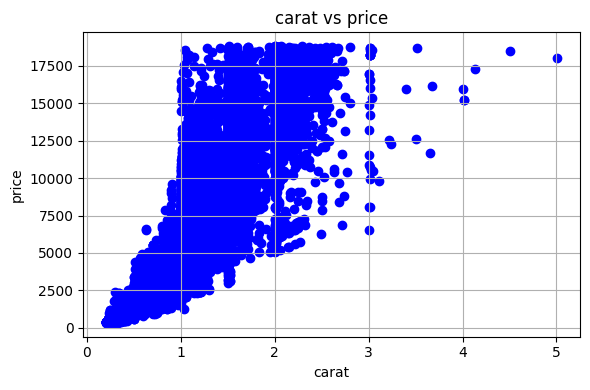

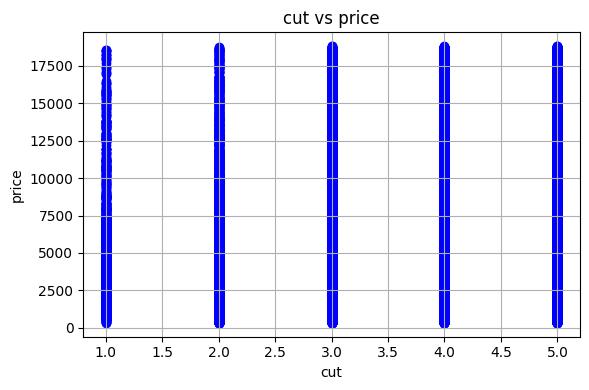

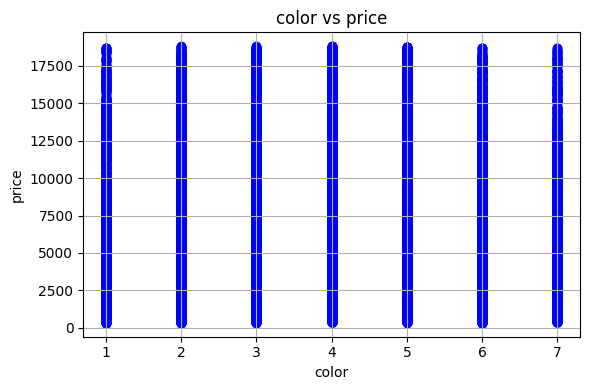

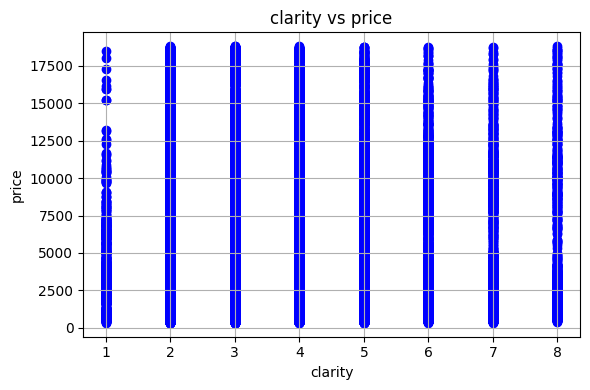

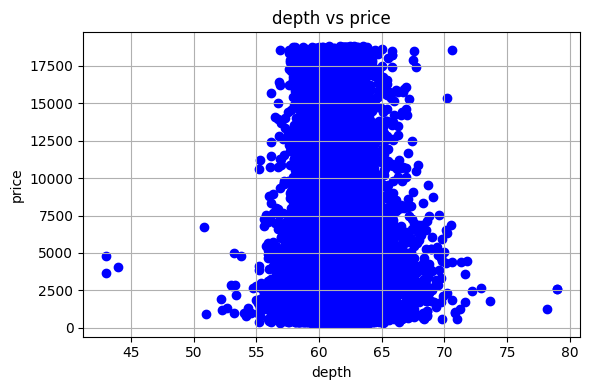

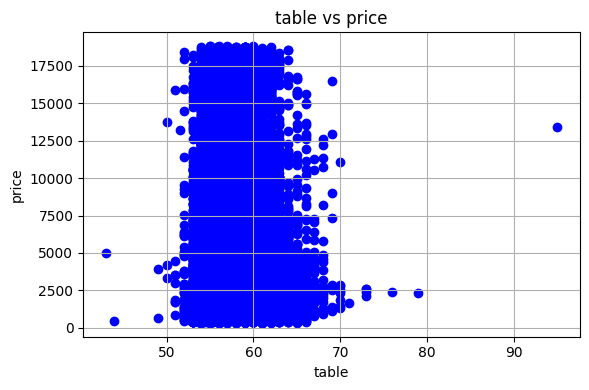

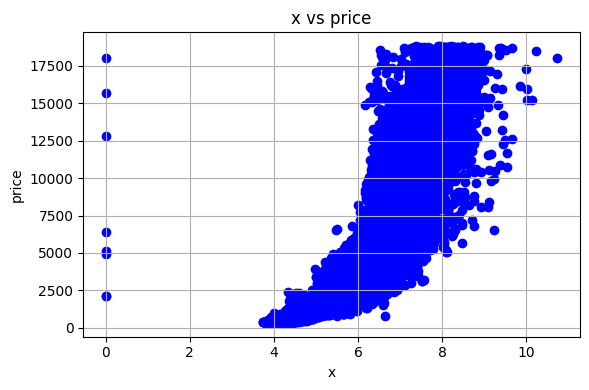

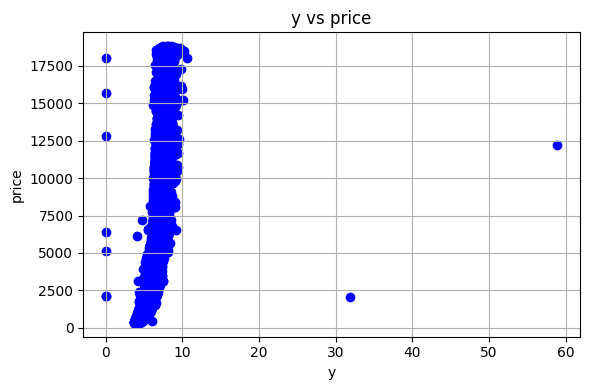

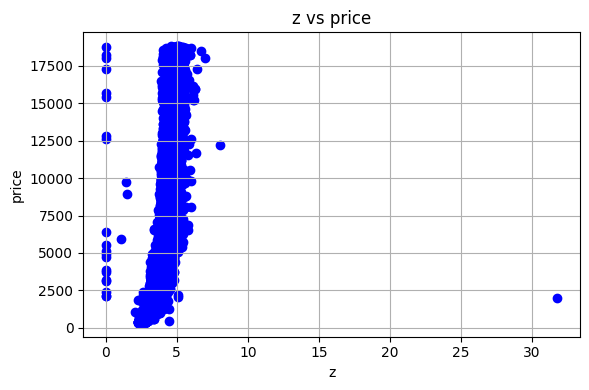

In [11]:
for column in data.drop(columns=['price']).columns:
      plt.figure(figsize=(6, 4))
      plt.scatter(data[column], data['price'], color='blue')
      plt.title(f'{column} vs price')
      plt.xlabel(column)
      plt.ylabel('price')
      plt.grid(True)
      plt.tight_layout()
      plt.show()
      print()


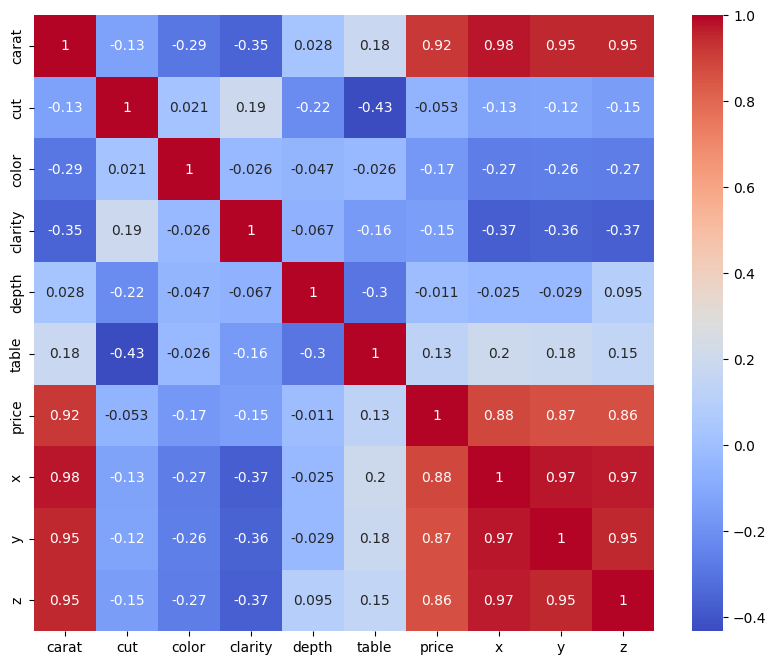

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## From the heatmap, we can see that all the features have either a positive or negative correlation with the price. However, the 'depth' feature has a very low correlation with the price, so dropping it will probably have a positive effect on our model's accuracy.

# Dropping 'depth' column

In [13]:
data = data.drop('depth', axis=1)

# Box plot to detect outliers

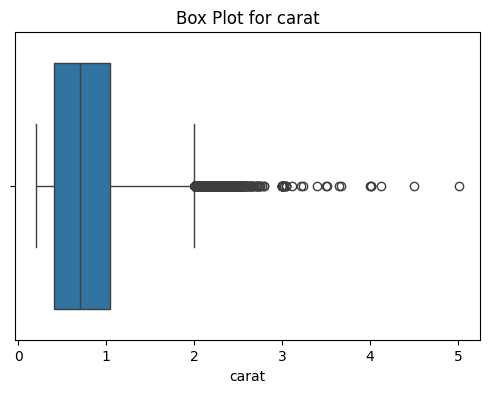

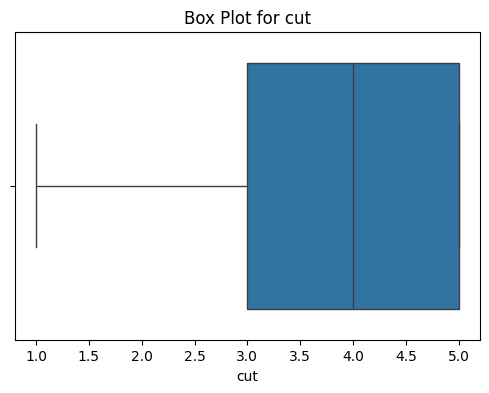

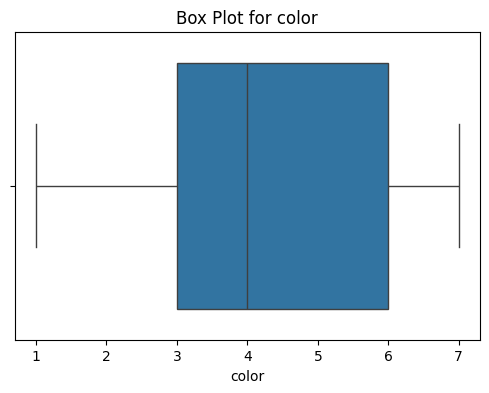

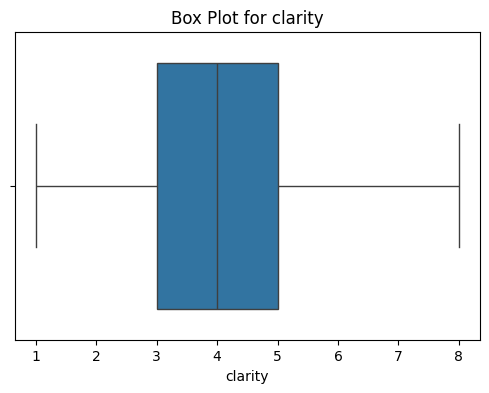

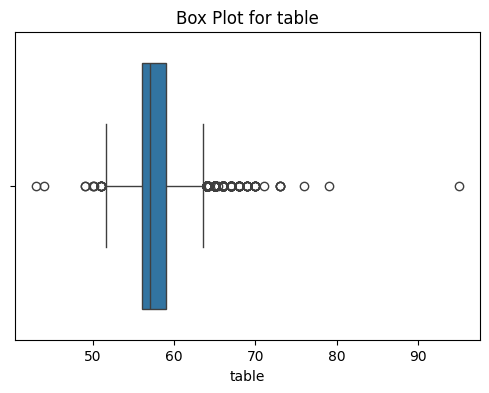

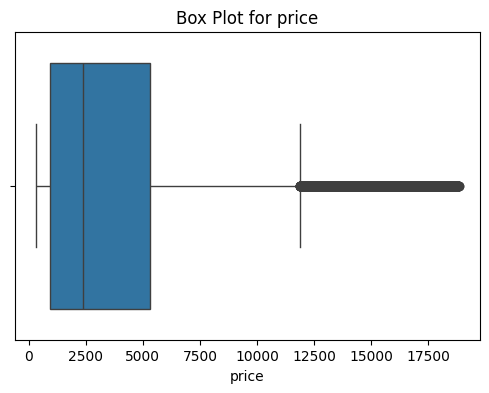

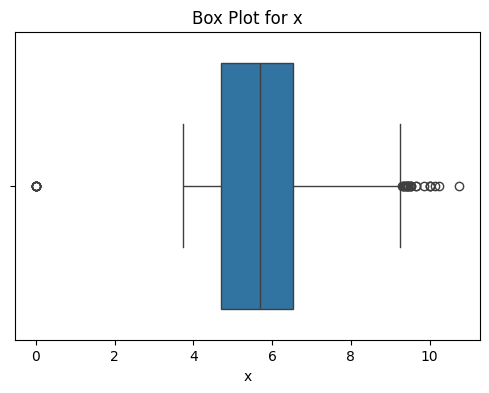

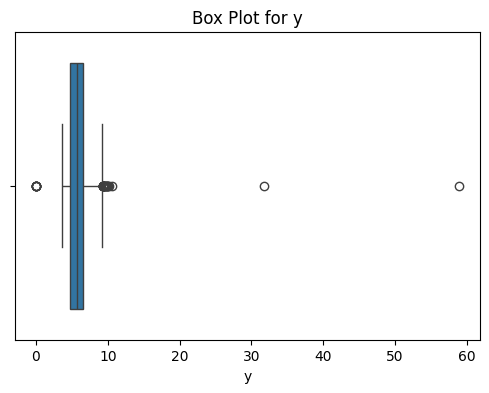

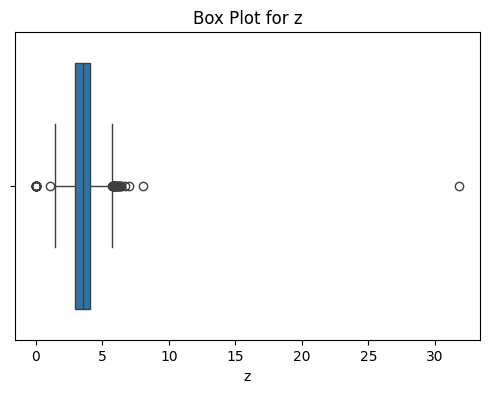

In [14]:
for feature in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot for {feature}')
    plt.show()

## Filtering outliers (columns: carat , table , x , y , z)

In [15]:
data= data[data['carat'] < 1.9 ]
data = data[(data['table'] > 53 ) & (data['table'] < 61)]
data = data[data['x'] < 9.2]
data = data[data['y'] < 9.2]
data = data[(data['z'] < 5.8) & (data['z'] > 1.2)]
data

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,5,6,2,55.0,326,3.95,3.98,2.43
3,0.29,4,2,4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,58.0,2757,6.15,6.12,3.74


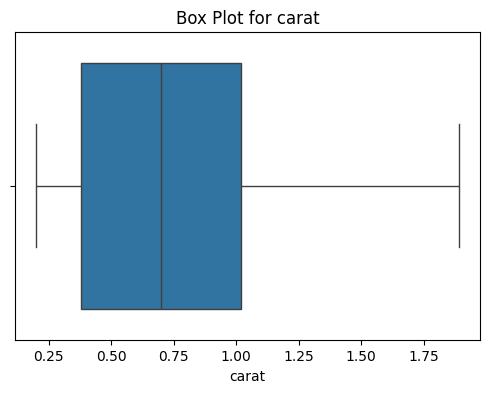

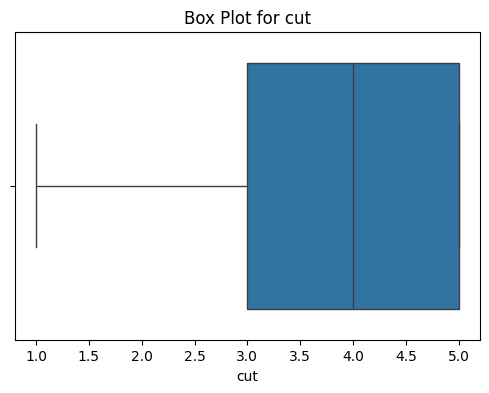

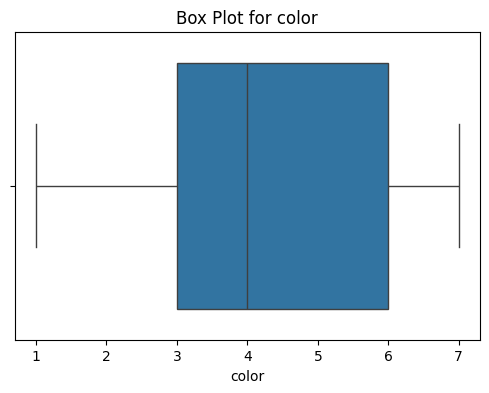

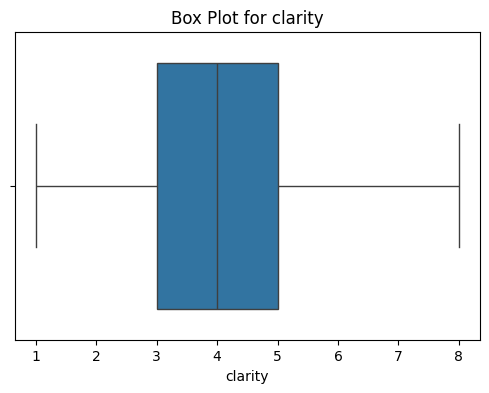

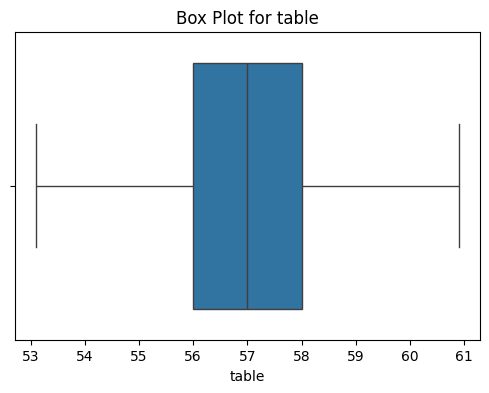

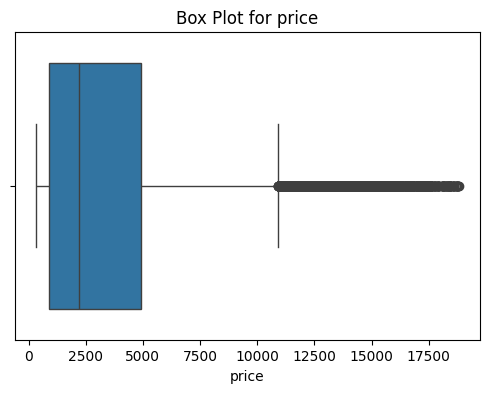

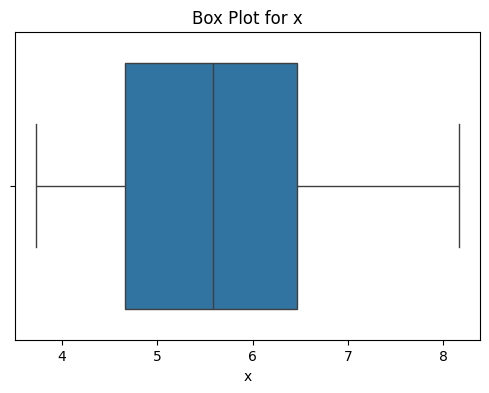

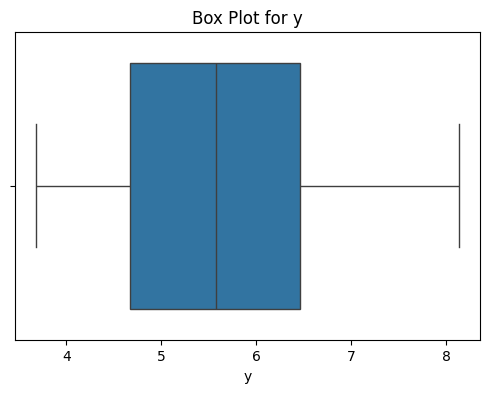

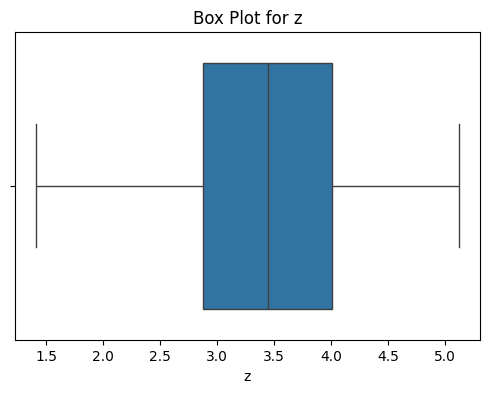

In [16]:
for feature in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot for {feature}')
    plt.show()

# Splitting Features & Output

In [17]:
X = data.drop(['price'] , axis=1 , inplace = False)
X

,carat,cut,color,clarity,table,x,y,z
0,0.23,5,6,2,55.0,3.95,3.98,2.43
3,0.29,4,2,4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,58.0,4.34,4.35,2.75
5,0.24,3,1,6,57.0,3.94,3.96,2.48
6,0.24,3,2,7,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,57.0,5.75,5.76,3.50
53936,0.72,2,7,3,55.0,5.69,5.75,3.61
53937,0.70,3,7,3,60.0,5.66,5.68,3.56
53938,0.86,4,3,2,58.0,6.15,6.12,3.74


In [18]:
y = data['price']
y

,price
0,326
3,334
4,335
5,336
6,336
...,...
53935,2757
53936,2757
53937,2757
53938,2757


# Dividing data (Train & Test)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (34978, 8)
X_test shape is  (11660, 8)
y_train shape is  (34978,)
y_test shape is  (11660,)


# Training

# #1 Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [21]:
LinearRegressionModel = make_pipeline(StandardScaler() ,LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1))
LinearRegressionModel.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(n_jobs=-1))])

# Evaluation

In [22]:
y_pred = LinearRegressionModel.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
#Calculating Cost Function (MSE)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1050838.373535355


In [25]:
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train)*100,"%")
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test)*100,"%")

Linear Regression Train Score is :  90.16781691962528 %
Linear Regression Test Score is :  90.4830203156513 %


# #2 Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=44)
RandomForestRegressorModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=44)

In [31]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train)*100,"%")
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test)*100,"%")

Random Forest Regressor Train Score is :  81.81321002821292 %
Random Forest Regressor Test Score is :  82.40663040760509 %


In [32]:
#Calculating Cost Function (MSE)
y_pred = RandomForestRegressorModel.predict(X_test)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1942610.8388024666


# #3 Decision Tree Rgeression

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=33)

In [35]:
#Calculating Cost Function (MSE)
y_pred = DecisionTreeRegressorModel.predict(X_test)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1303678.4200640393


In [36]:
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train)*100,"%")
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test)*100,"%")

DecisionTreeRegressor Train Score is :  87.92936590871612 %
DecisionTreeRegressor Test Score is :  88.19315952753811 %


# #4 KNN Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',
                                               algorithm = 'auto')
KNeighborsRegressorModel.fit(X_train, y_train)

KNeighborsRegressor()

In [39]:
#Calculating Cost Function (MSE)
y_pred = KNeighborsRegressorModel.predict(X_test)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  356047.51656946825


In [40]:
print("KNeighborsRegressorModel Train Score is : " , KNeighborsRegressorModel.score(X_train, y_train)*100,"%")
print("KNeighborsRegressorModel Test Score is : " , KNeighborsRegressorModel.score(X_test, y_test)*100,"%")

KNeighborsRegressorModel Train Score is :  97.8397611155935 %
KNeighborsRegressorModel Test Score is :  96.77543467464511 %


## Conclusion  
This project focused on predicting diamond prices using various machine learning models. Initial data exploration revealed that most features showed meaningful correlations with the price, except for `depth`, which was removed to potentially improve model performance. Additionally, outliers were filtered to reduce noise and improve accuracy.

We trained and evaluated four models: **K-Nearest Neighbors (KNN), Linear Regression, Decision Tree, and Random Forest.**  
The models ranked as follows based on their accuracy:  

1. **K-Nearest Neighbors (KNN)** achieved the highest performance, with a train score of **97.83%** and a test score of **96.78%**, demonstrating strong generalization.  
2. **Linear Regression** performed well, indicating a linear relationship between features and price, with a train score of **90.17%** and a test score of **90.48%**.  
3. **Decision Tree Regressor** showed reasonable accuracy, with a train score of **87.93%** and a test score of **88.19%**.  
4. **Random Forest Regressor** delivered lower accuracy than expected, with a train score of **81.81%** and a test score of **82.41%**, possibly due to overfitting or suboptimal hyperparameter settings.